# 最小二乗法と決定係数
説明変数が対数面積，非説明変数が対数価格で与えられる日本ビルファンドのデータに対して，定数項を含む単純回帰モデルを当てはめ，最小二乗推定値と決定係数を計算する．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
df = pd.read_csv("./Data/JREIT_OLS_Rsq_data_week3.csv")
df.head()

,通し番号,物件名称,ln(Area),ln(Price)
0,1,六本木ティーキューブ,3.544922,4.152613
1,2,西新宿三井ビルディング,3.513275,3.815512
2,3,セレスティン芝三井ビルディング,3.637876,3.945458
3,4,ＮＢＦ品川タワー,3.126892,3.899950
4,5,芝ＮＢＦタワー,3.208017,3.387774


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   通し番号       71 non-null     int64  
 1   物件名称       71 non-null     object 
 2   ln(Area)   71 non-null     float64
 3   ln(Price)  71 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


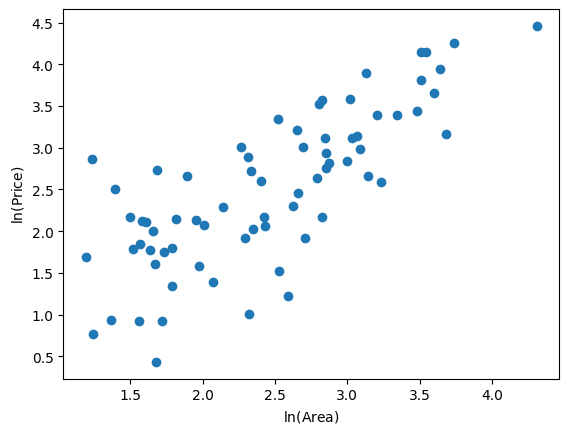

In [4]:
fig, ax = plt.subplots()
ax.scatter(x="ln(Area)", y="ln(Price)", data=df)
ax.set_xlabel(r"$\ln(\text{Area})$")
ax.set_ylabel(r"$\ln(\text{Price})$")
pass

散布図から定数項を含む単純回帰モデルを考える：
$$
y_i = \alpha + \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
回帰直線
$$
\hat{y} = \hat{\alpha} + \hat{\beta}x
$$
を引く．ここで，最小二乗推定量 $\hat{\alpha},\hat{\beta}$ は
$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x},~~~~
\hat{\beta} = \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i-\bar{x})^2}
$$
で与えられる．

In [5]:
# compute the estimate of alpha
def alpha_hat(df, x, y):
    x, y = df[x], df[y]
    x_bar, y_bar = x.mean(), y.mean()
    sum_products = sum((x-x_bar) * (y-y_bar))
    sum_squared = sum((x-x_bar)**2)
    return y_bar - (sum_products / sum_squared) * x_bar

# compute the estimate of beta
def beta_hat(df, x, y):
    x, y = df[x], df[y]
    x_bar, y_bar = x.mean(), y.mean()
    sum_products = sum((x-x_bar) * (y-y_bar))
    sum_squared = sum((x-x_bar)**2)
    return sum_products / sum_squared

# compute the estimate of y
def y_hat(df, x, y):
    x, y = df[x], df[y]
    x_bar, y_bar = x.mean(), y.mean()
    sum_products = sum((x-x_bar) * (y-y_bar))
    sum_squared = sum((x-x_bar)**2)
    alpha_hat = y_bar - (sum_products / sum_squared) * x_bar
    beta_hat = sum_products / sum_squared
    return alpha_hat + beta_hat * x

In [6]:
# calculate the least squares estimates
alpha_hat = alpha_hat(df, x="ln(Area)", y="ln(Price)")
beta_hat = beta_hat(df, x="ln(Area)", y="ln(Price)")
print(f"estimate of alpha: {alpha_hat}")
print(f"estimate of beta: {beta_hat}")

estimate of alpha: 0.14143547904073195
estimate of beta: 0.9648456598199819


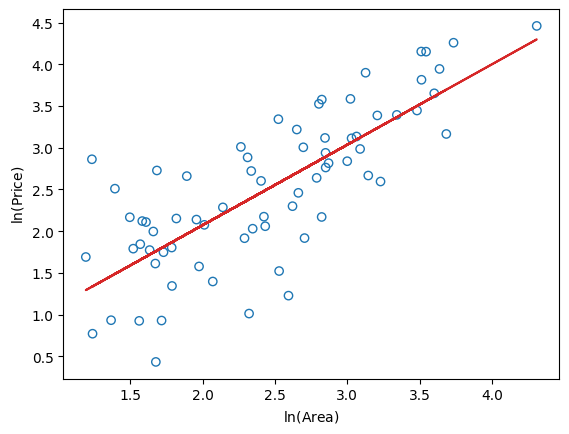

In [7]:
# draw the regression line
fig, ax = plt.subplots()
ax.scatter(x="ln(Area)", y="ln(Price)", data=df, facecolors="none", edgecolors="tab:blue")
ax.plot(df["ln(Area)"], y_hat(df, x="ln(Area)", y="ln(Price)"),c="tab:red")
ax.set_xlabel(r"$\ln(\text{Area})$")
ax.set_ylabel(r"$\ln(\text{Price})$")
pass